Chemical_Lab_Apparatus_Training_YOLOv11

In [ ]:
!nvidia-smi

Wed Apr 30 03:59:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
%pip install "ultralytics<=8.3.40" roboflow supervision

import ultralytics
ultralytics.checks()

import os
HOME = os.getcwd()
print("Working directory:", HOME)

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/112.6 GB disk)
Working directory: /content


In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="")
project = rf.workspace("").project("")
dataset = project.version(8).download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chemistry-Lab-Apparatus-DETN-8 in yolov11:: 100%|██████████| 9210/9210 [00:01<00:00, 7837.05it/s]


In [ ]:
!ls {dataset.location}

!cat {dataset.location}/data.yaml

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 25
names: ['Beaker', 'Buchner_Funnel', 'Burette_Stands', 'Calorimeter', 'Conical_Flask', 'Funnel', 'Glass_Rod', 'Measuring_Cylinder', 'Mechanical_Balance_Scale', 'Nessler_Reagent_Bottle', 'Pipette', 'Porcelain_Mortar Pestle', 'Precision_Weight_Scale', 'Reagent_Bottle', 'Round_Bottom_Flask_Borosilicate_Glass_1_Neck', 'Round_Bottom_Flask_Borosilicate_Glass_2_Neck', 'Round_Bottom_Flask_Borosilicate_Glass_3_Neck', 'Separating_Funnel', 'Spirit_Lamp', 'TestTube_Holder', 'Test_Tube', 'Volumetric_Flask', 'Volumetric_Pipet', 'Wash_Bottle', 'Weighing_Bottle']

roboflow:
  workspace: dip-project-cktfe
  project: chemistry-lab-apparatus-detn
  version: 8
  license: CC BY 4.0
  url: https://universe.roboflow.com/dip-project-cktfe/chemistry-lab-apparatus-detn/dataset/8

In [ ]:
from ultralytics import YOLO

model = YOLO('yolo11s.pt')

results = model.train(
    data=f'{dataset.location}/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='yolov11_chemistry_apparatus'
)

100%|██████████| 18.4M/18.4M [00:00<00:00, 167MB/s]


New https://pypi.org/project/ultralytics/8.3.121 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/Chemistry-Lab-Apparatus-DETN-8/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov11_chemistry_apparatus, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mas

100%|██████████| 5.35M/5.35M [00:00<00:00, 332MB/s]


AMP: checks passed ✅


train: Scanning /content/Chemistry-Lab-Apparatus-DETN-8/train/labels... 3220 images, 4 backgrounds, 0 corrupt: 100%|██████████| 3220/3220 [00:01<00:00, 2197.98it/s]

train: New cache created: /content/Chemistry-Lab-Apparatus-DETN-8/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 162, len(boxes) = 4863. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: '2.0.6' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/Chemistry-Lab-Apparatus-DETN-8/valid/labels... 920 images, 1 backgrounds, 0 corrupt: 100%|██████████| 920/920 [00:00<00:00, 1205.97it/s]


val: New cache created: /content/Chemistry-Lab-Apparatus-DETN-8/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 23, len(boxes) = 1393. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/yolov11_chemistry_apparatus/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov11_chemistry_apparatus
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       4.4G      2.315      6.658      2.352         66        640:   1%|▏         | 3/202 [00:02<02:18,  1.43it/s]

       1/50      4.43G      2.433      7.021      2.568         49        640:   3%|▎         | 7/202 [00:04<01:21,  2.38it/s]
100%|██████████| 755k/755k [00:00<00:00, 41.5MB/s]
       1/50       4.5G      1.564      3.396      1.704         10        640: 100%|██████████| 202/202 [01:08<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.79it/s]

                   all        920       1393      0.758      0.818      0.843      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.48G      1.311      1.473      1.405         31        640: 100%|██████████| 202/202 [01:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.26it/s]

                   all        920       1393      0.828      0.848      0.919      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.44G      1.299      1.298      1.397         18        640: 100%|██████████| 202/202 [01:06<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.38it/s]

                   all        920       1393      0.854      0.841      0.914      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.45G      1.293      1.168      1.385         16        640: 100%|██████████| 202/202 [01:04<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.24it/s]

                   all        920       1393      0.885      0.856      0.915      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.43G      1.257      1.093      1.371         11        640: 100%|██████████| 202/202 [01:04<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.12it/s]

                   all        920       1393      0.903      0.883      0.928      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.47G      1.253      1.029      1.362         14        640: 100%|██████████| 202/202 [01:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.19it/s]

                   all        920       1393      0.907      0.909       0.94      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.43G      1.239     0.9857      1.353          8        640: 100%|██████████| 202/202 [01:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.20it/s]

                   all        920       1393      0.942      0.936      0.971      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.45G      1.212     0.9352      1.331         17        640: 100%|██████████| 202/202 [01:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.42it/s]

                   all        920       1393      0.939      0.946      0.968      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.45G      1.208     0.9066      1.327         11        640: 100%|██████████| 202/202 [01:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.14it/s]

                   all        920       1393      0.939      0.951      0.969      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.44G      1.192     0.8823      1.324          9        640: 100%|██████████| 202/202 [01:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.15it/s]

                   all        920       1393       0.95      0.933       0.97      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.45G      1.161     0.8566      1.305         13        640: 100%|██████████| 202/202 [01:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.17it/s]

                   all        920       1393      0.953      0.962      0.975      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.44G      1.155     0.8249      1.303         11        640: 100%|██████████| 202/202 [01:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.45it/s]

                   all        920       1393      0.954      0.948      0.974      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.43G      1.161     0.8005      1.297         12        640: 100%|██████████| 202/202 [01:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.17it/s]

                   all        920       1393      0.948      0.957      0.972      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.45G      1.155     0.8088      1.299         11        640: 100%|██████████| 202/202 [01:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.14it/s]

                   all        920       1393       0.96      0.964      0.979      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.43G      1.129     0.7664      1.284         11        640: 100%|██████████| 202/202 [01:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.16it/s]

                   all        920       1393       0.95      0.963      0.978      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.45G      1.132     0.7754      1.271         30        640: 100%|██████████| 202/202 [01:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.37it/s]

                   all        920       1393      0.969      0.972      0.981      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.43G      1.126     0.7493      1.275         14        640: 100%|██████████| 202/202 [01:05<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.42it/s]

                   all        920       1393      0.959      0.959       0.98      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.48G      1.102      0.739      1.261         15        640: 100%|██████████| 202/202 [01:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.14it/s]

                   all        920       1393      0.953      0.957      0.975      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.43G      1.106     0.7317      1.259         10        640: 100%|██████████| 202/202 [01:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.14it/s]

                   all        920       1393      0.972      0.968      0.983      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.46G      1.098     0.7133      1.255          6        640: 100%|██████████| 202/202 [01:04<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.16it/s]

                   all        920       1393      0.971      0.968      0.985      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.45G      1.081     0.6902      1.252         10        640: 100%|██████████| 202/202 [01:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.37it/s]

                   all        920       1393      0.966      0.972      0.983      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.44G      1.073     0.6922      1.243         13        640: 100%|██████████| 202/202 [01:05<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.28it/s]

                   all        920       1393      0.956      0.967      0.982      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.43G      1.083     0.6754      1.238         15        640: 100%|██████████| 202/202 [01:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.17it/s]

                   all        920       1393      0.967      0.972      0.984      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.45G      1.072     0.6703      1.242         14        640: 100%|██████████| 202/202 [01:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.20it/s]

                   all        920       1393      0.964       0.97      0.979      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.42G      1.058     0.6631      1.231         16        640: 100%|██████████| 202/202 [01:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.15it/s]

                   all        920       1393      0.971       0.97      0.979      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.45G      1.059     0.6552      1.229         11        640: 100%|██████████| 202/202 [01:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.42it/s]

                   all        920       1393      0.958      0.977      0.983      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.45G      1.043     0.6256      1.223          7        640: 100%|██████████| 202/202 [01:05<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.29it/s]

                   all        920       1393       0.96      0.973      0.983      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.46G      1.033     0.6247      1.219         15        640: 100%|██████████| 202/202 [01:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.14it/s]

                   all        920       1393      0.967      0.976      0.985      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.45G      1.038     0.6239      1.221         12        640: 100%|██████████| 202/202 [01:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.13it/s]

                   all        920       1393      0.971       0.97      0.984       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.44G       1.03     0.6111       1.22         14        640: 100%|██████████| 202/202 [01:04<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.17it/s]

                   all        920       1393      0.965      0.974      0.984      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.43G      1.018      0.598      1.205          7        640: 100%|██████████| 202/202 [01:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.34it/s]

                   all        920       1393      0.968      0.973      0.984      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.45G      1.006     0.5971      1.199         10        640: 100%|██████████| 202/202 [01:04<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.34it/s]

                   all        920       1393      0.965      0.974      0.982      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.43G      1.015     0.5992      1.206         16        640: 100%|██████████| 202/202 [01:04<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.15it/s]

                   all        920       1393      0.969      0.969      0.983      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.45G     0.9926     0.5868      1.194         13        640: 100%|██████████| 202/202 [01:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.17it/s]

                   all        920       1393       0.97      0.978      0.984      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.45G     0.9956     0.5718      1.199          6        640: 100%|██████████| 202/202 [01:04<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.19it/s]

                   all        920       1393      0.974      0.973      0.984      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.44G     0.9621     0.5574      1.177         10        640: 100%|██████████| 202/202 [01:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.45it/s]

                   all        920       1393      0.965      0.976      0.983      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.45G     0.9827     0.5672      1.191         16        640: 100%|██████████| 202/202 [01:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.16it/s]

                   all        920       1393       0.97      0.974      0.984      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.46G     0.9773     0.5545      1.189          8        640: 100%|██████████| 202/202 [01:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.15it/s]

                   all        920       1393      0.973      0.977      0.986       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.43G     0.9716     0.5438      1.182          8        640: 100%|██████████| 202/202 [01:05<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.14it/s]

                   all        920       1393      0.975      0.974      0.984      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.47G     0.9581     0.5414      1.177         13        640: 100%|██████████| 202/202 [01:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.22it/s]

                   all        920       1393      0.974      0.978      0.986      0.738


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.43G     0.8895     0.3808      1.194          6        640: 100%|██████████| 202/202 [01:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.43it/s]

                   all        920       1393      0.972      0.978      0.986      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.45G     0.8761     0.3689      1.186          5        640: 100%|██████████| 202/202 [01:02<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.15it/s]

                   all        920       1393      0.968      0.978      0.985      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.43G     0.8644     0.3613      1.174          8        640: 100%|██████████| 202/202 [01:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.17it/s]

                   all        920       1393      0.972      0.979      0.986      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.45G      0.852     0.3568      1.156          5        640: 100%|██████████| 202/202 [01:02<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.44it/s]

                   all        920       1393      0.964      0.975      0.986      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.43G     0.8354     0.3506      1.148          7        640: 100%|██████████| 202/202 [01:02<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.18it/s]

                   all        920       1393      0.966      0.977      0.986      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.45G      0.838     0.3475      1.157          5        640: 100%|██████████| 202/202 [01:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.15it/s]

                   all        920       1393      0.973      0.974      0.986      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.43G      0.825      0.341      1.148          9        640: 100%|██████████| 202/202 [01:02<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.42it/s]

                   all        920       1393      0.968      0.977      0.987      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.45G     0.8229     0.3434      1.143         11        640: 100%|██████████| 202/202 [01:02<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.17it/s]

                   all        920       1393      0.967      0.977      0.987      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.43G     0.8081     0.3333      1.142          5        640: 100%|██████████| 202/202 [01:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.18it/s]

                   all        920       1393      0.963      0.975      0.987      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.45G      0.805     0.3334      1.137          4        640: 100%|██████████| 202/202 [01:03<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.45it/s]

                   all        920       1393      0.964      0.975      0.986      0.743



50 epochs completed in 1.034 hours.
Optimizer stripped from runs/detect/yolov11_chemistry_apparatus/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/yolov11_chemistry_apparatus/weights/best.pt, 19.2MB

Validating runs/detect/yolov11_chemistry_apparatus/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,422,475 parameters, 0 gradients, 21.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.72it/s]


                   all        920       1393      0.967      0.977      0.987      0.745
                Beaker         78         79      0.978      0.962      0.987      0.742
        Buchner_Funnel         44         56      0.975          1      0.994      0.784
        Burette_Stands         57         57       0.96      0.982      0.993      0.728
           Calorimeter         66         66      0.879          1      0.963      0.792
         Conical_Flask         78         79          1      0.883      0.977      0.774
                Funnel         47         48      0.979      0.963      0.994       0.74
             Glass_Rod         57         90      0.974          1      0.995      0.732
    Measuring_Cylinder         43         49      0.956          1      0.986      0.711
Mechanical_Balance_Scale         47         47      0.958      0.973      0.991       0.77
Nessler_Reagent_Bottle         50         51      0.953      0.941      0.975      0.786
               Pipe

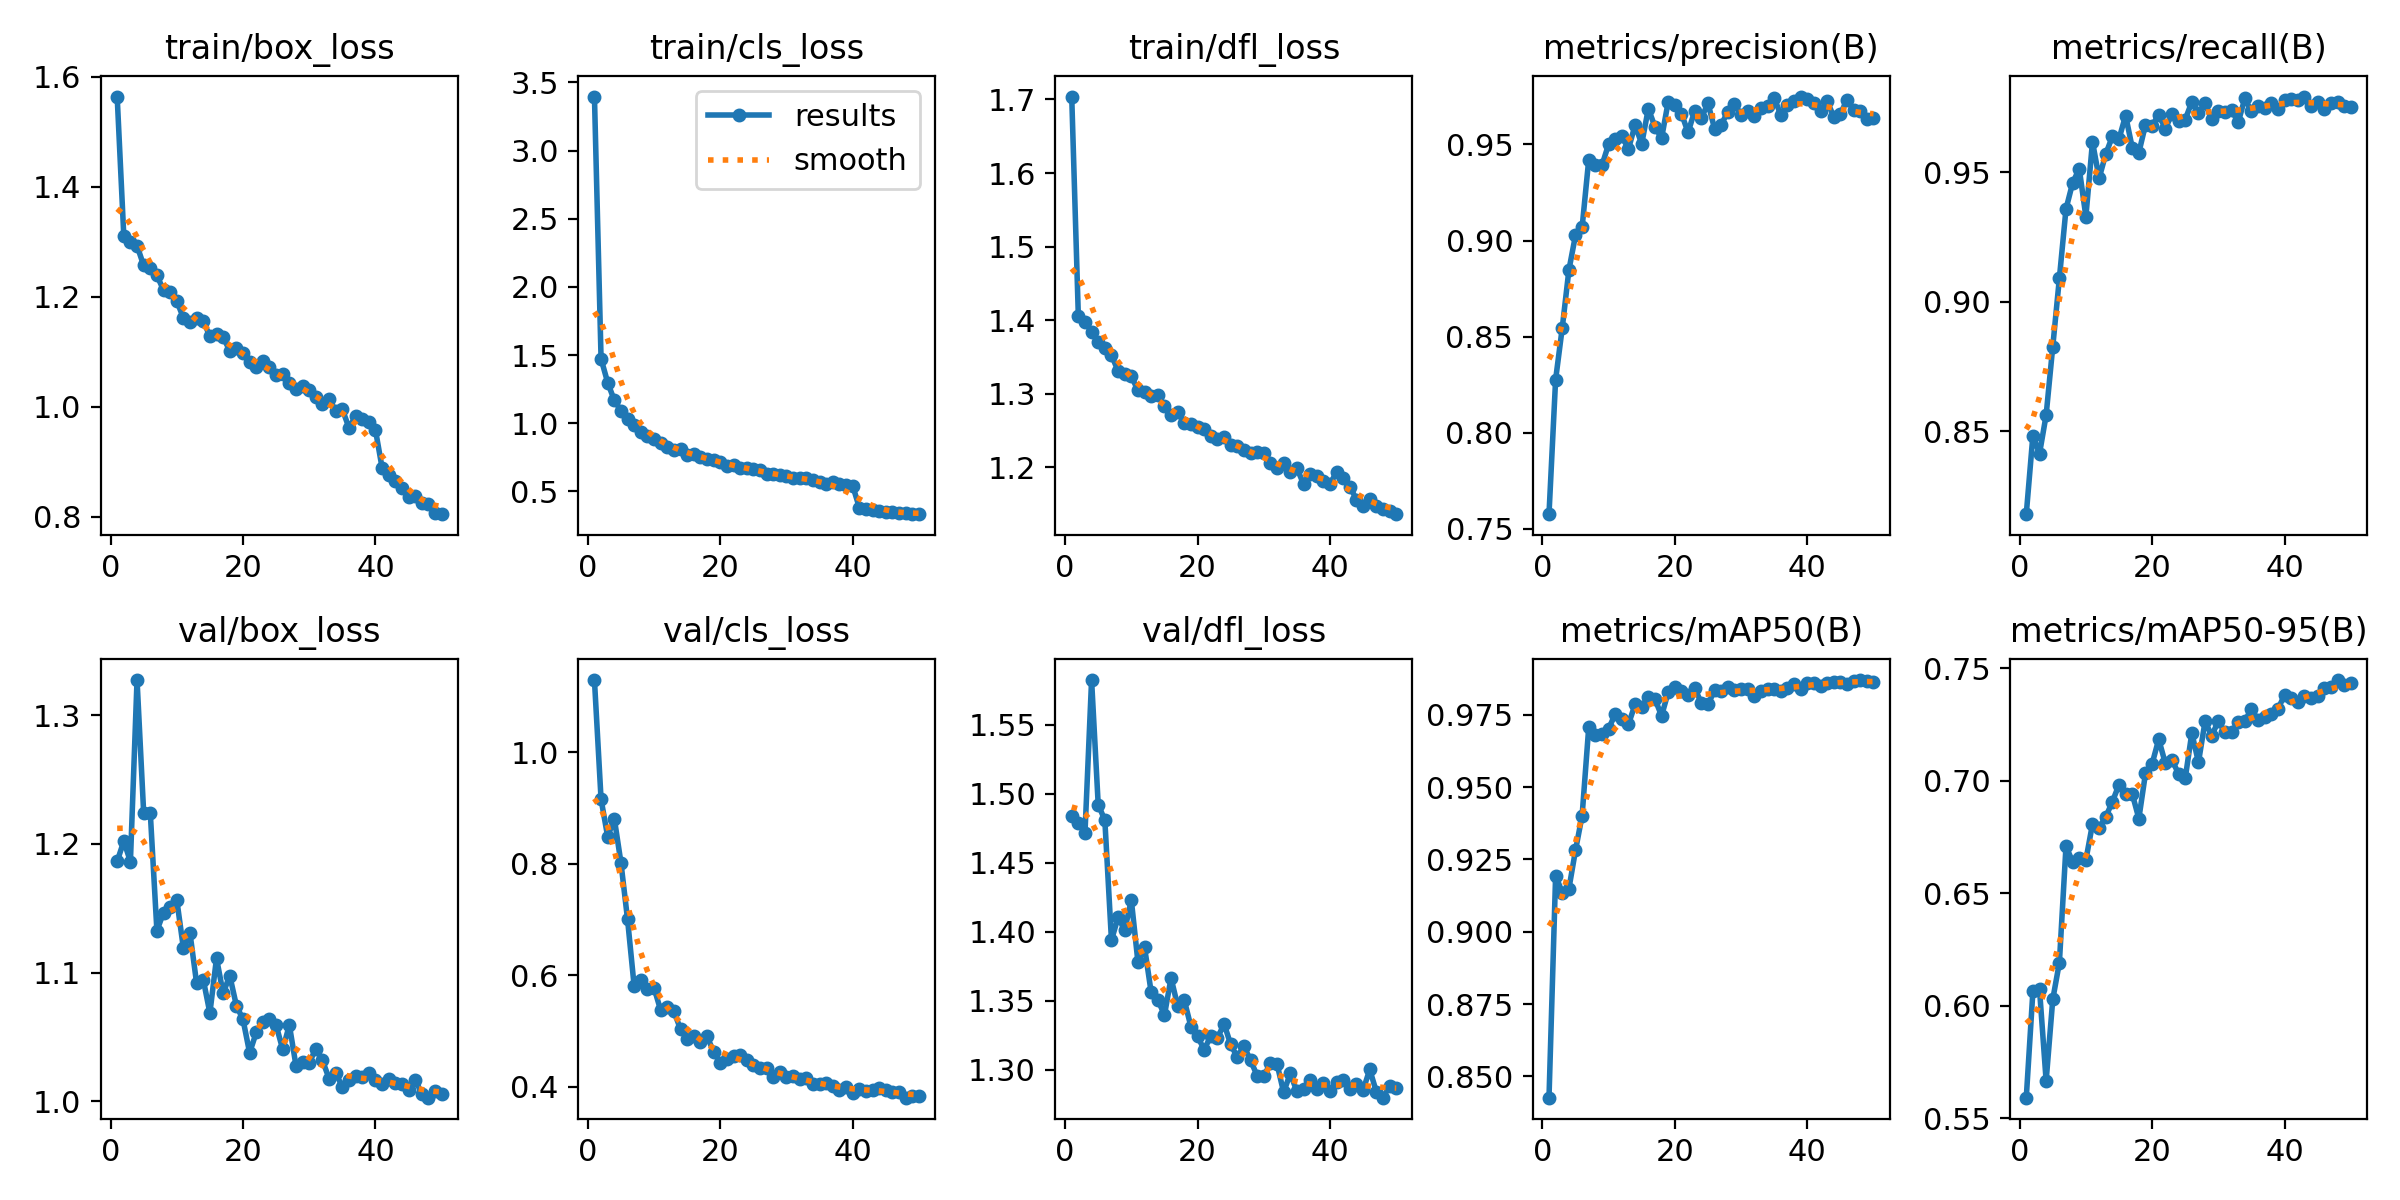

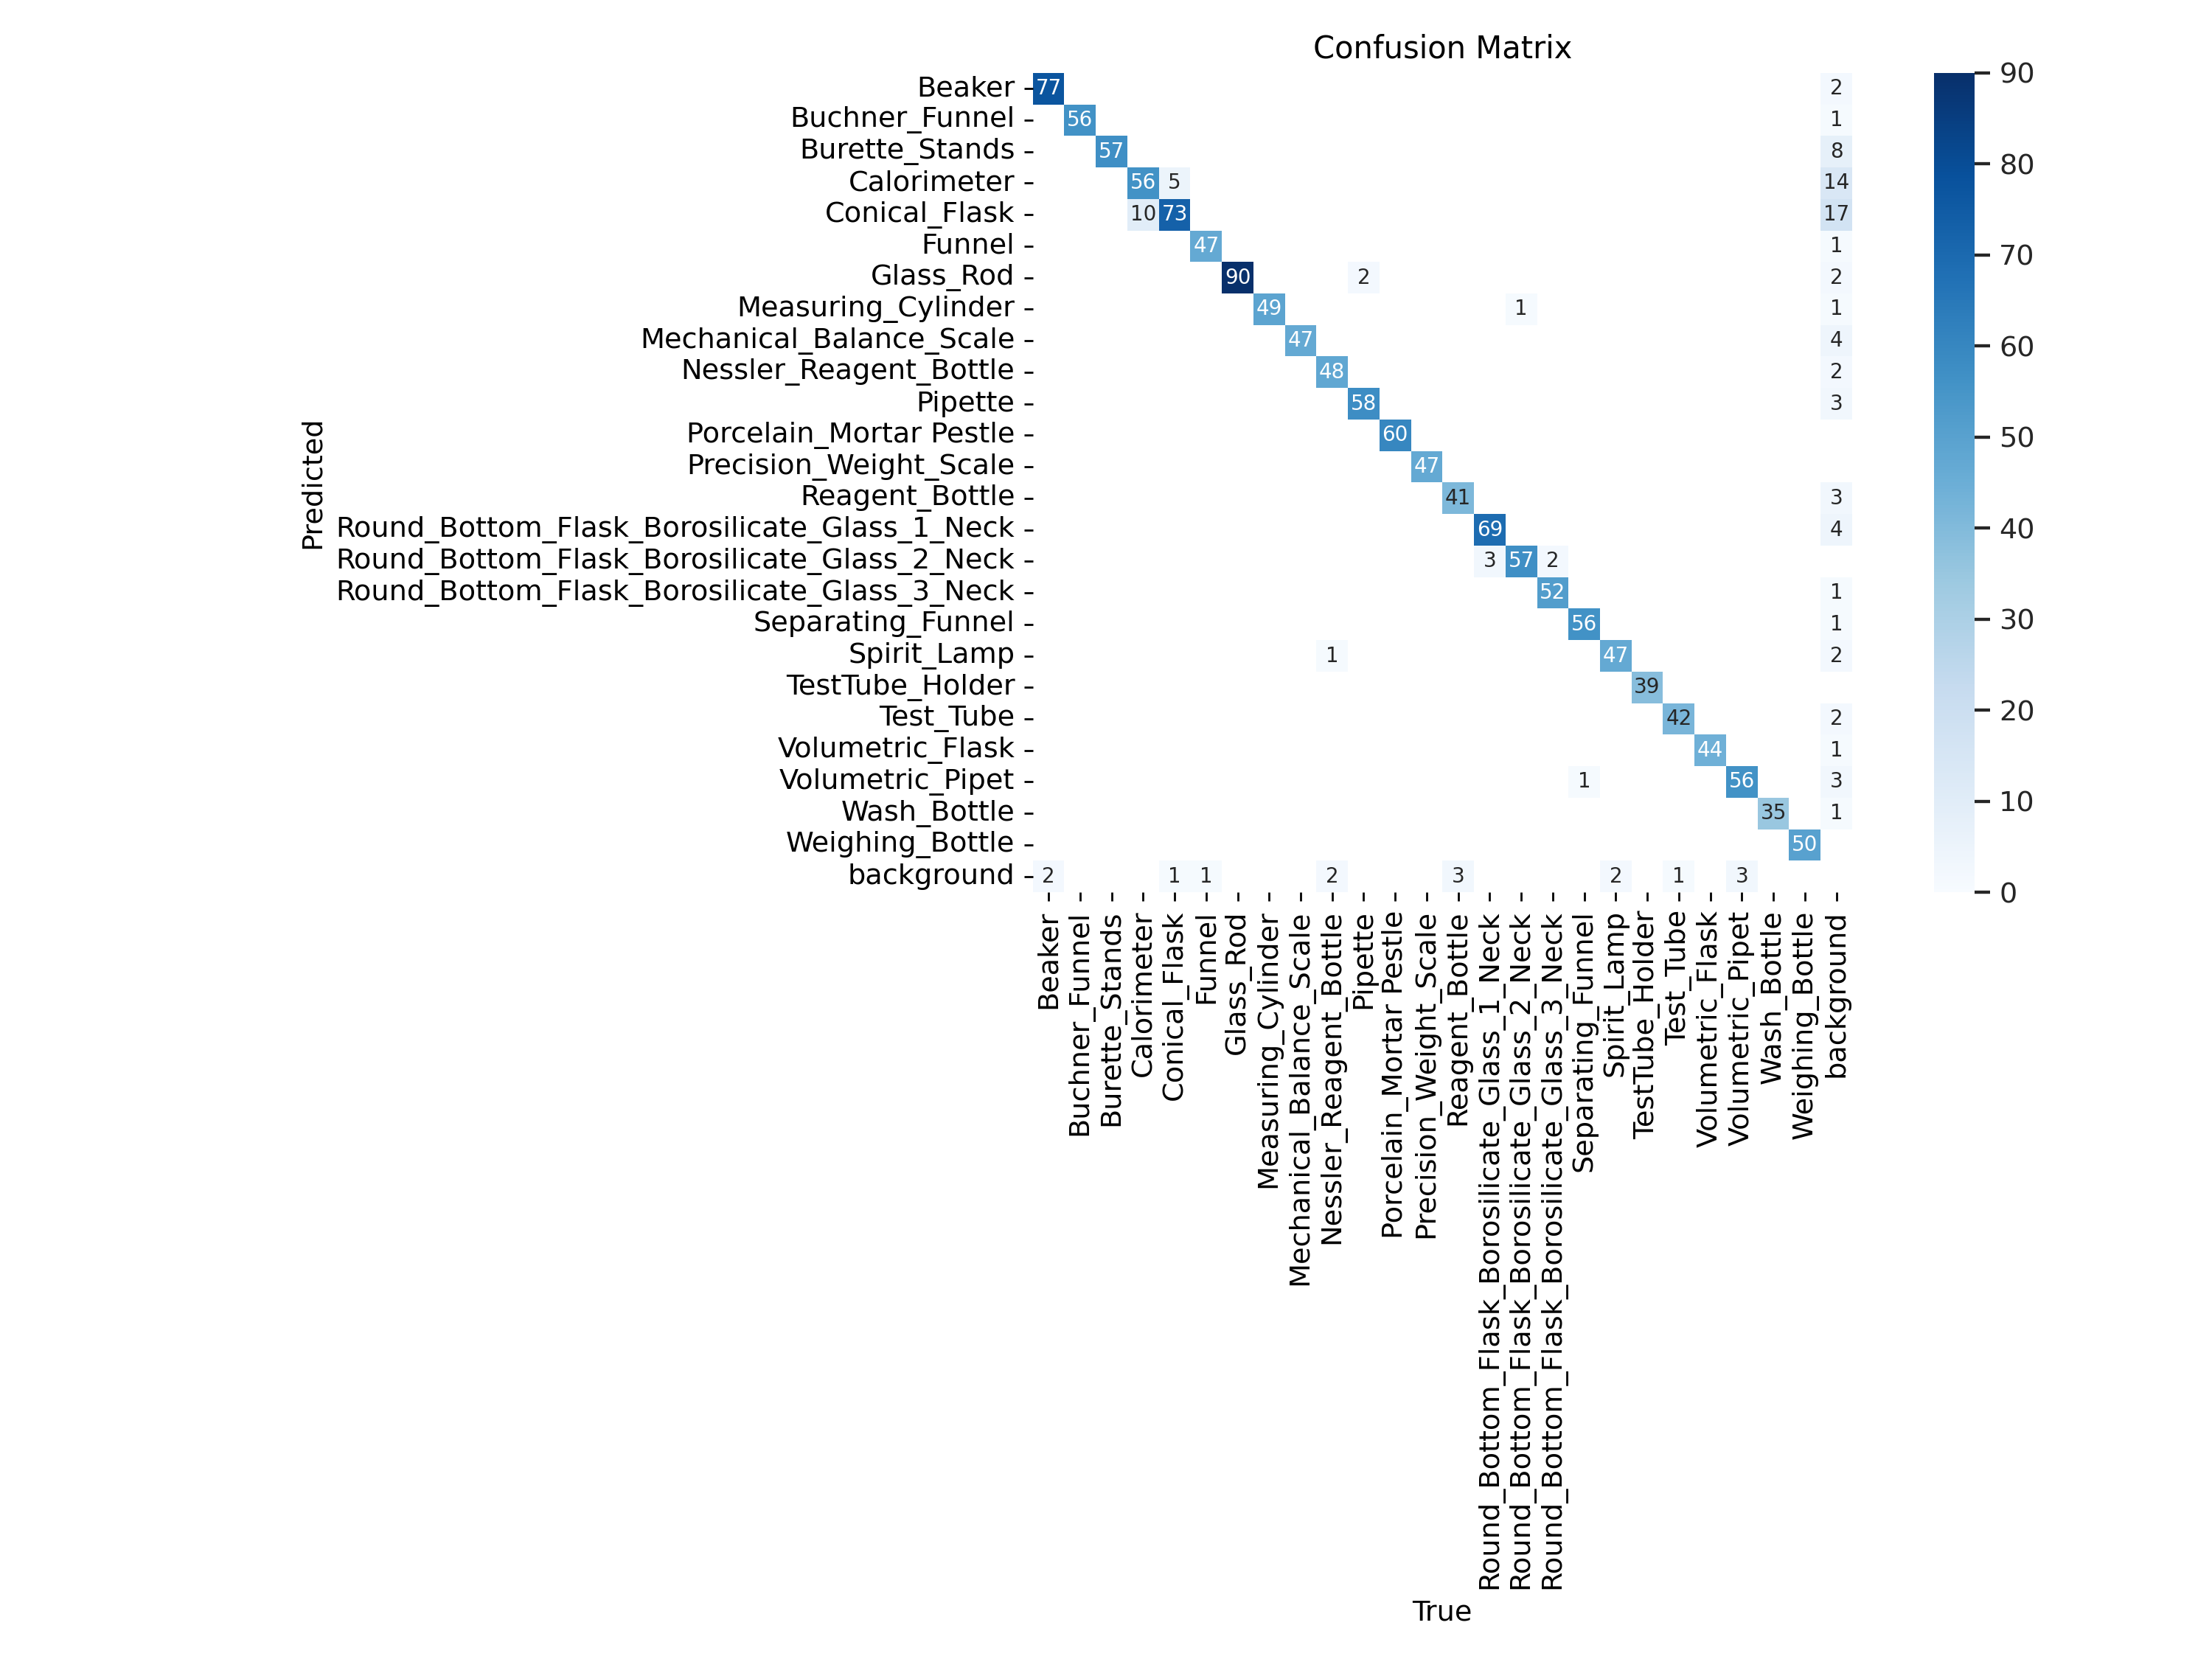

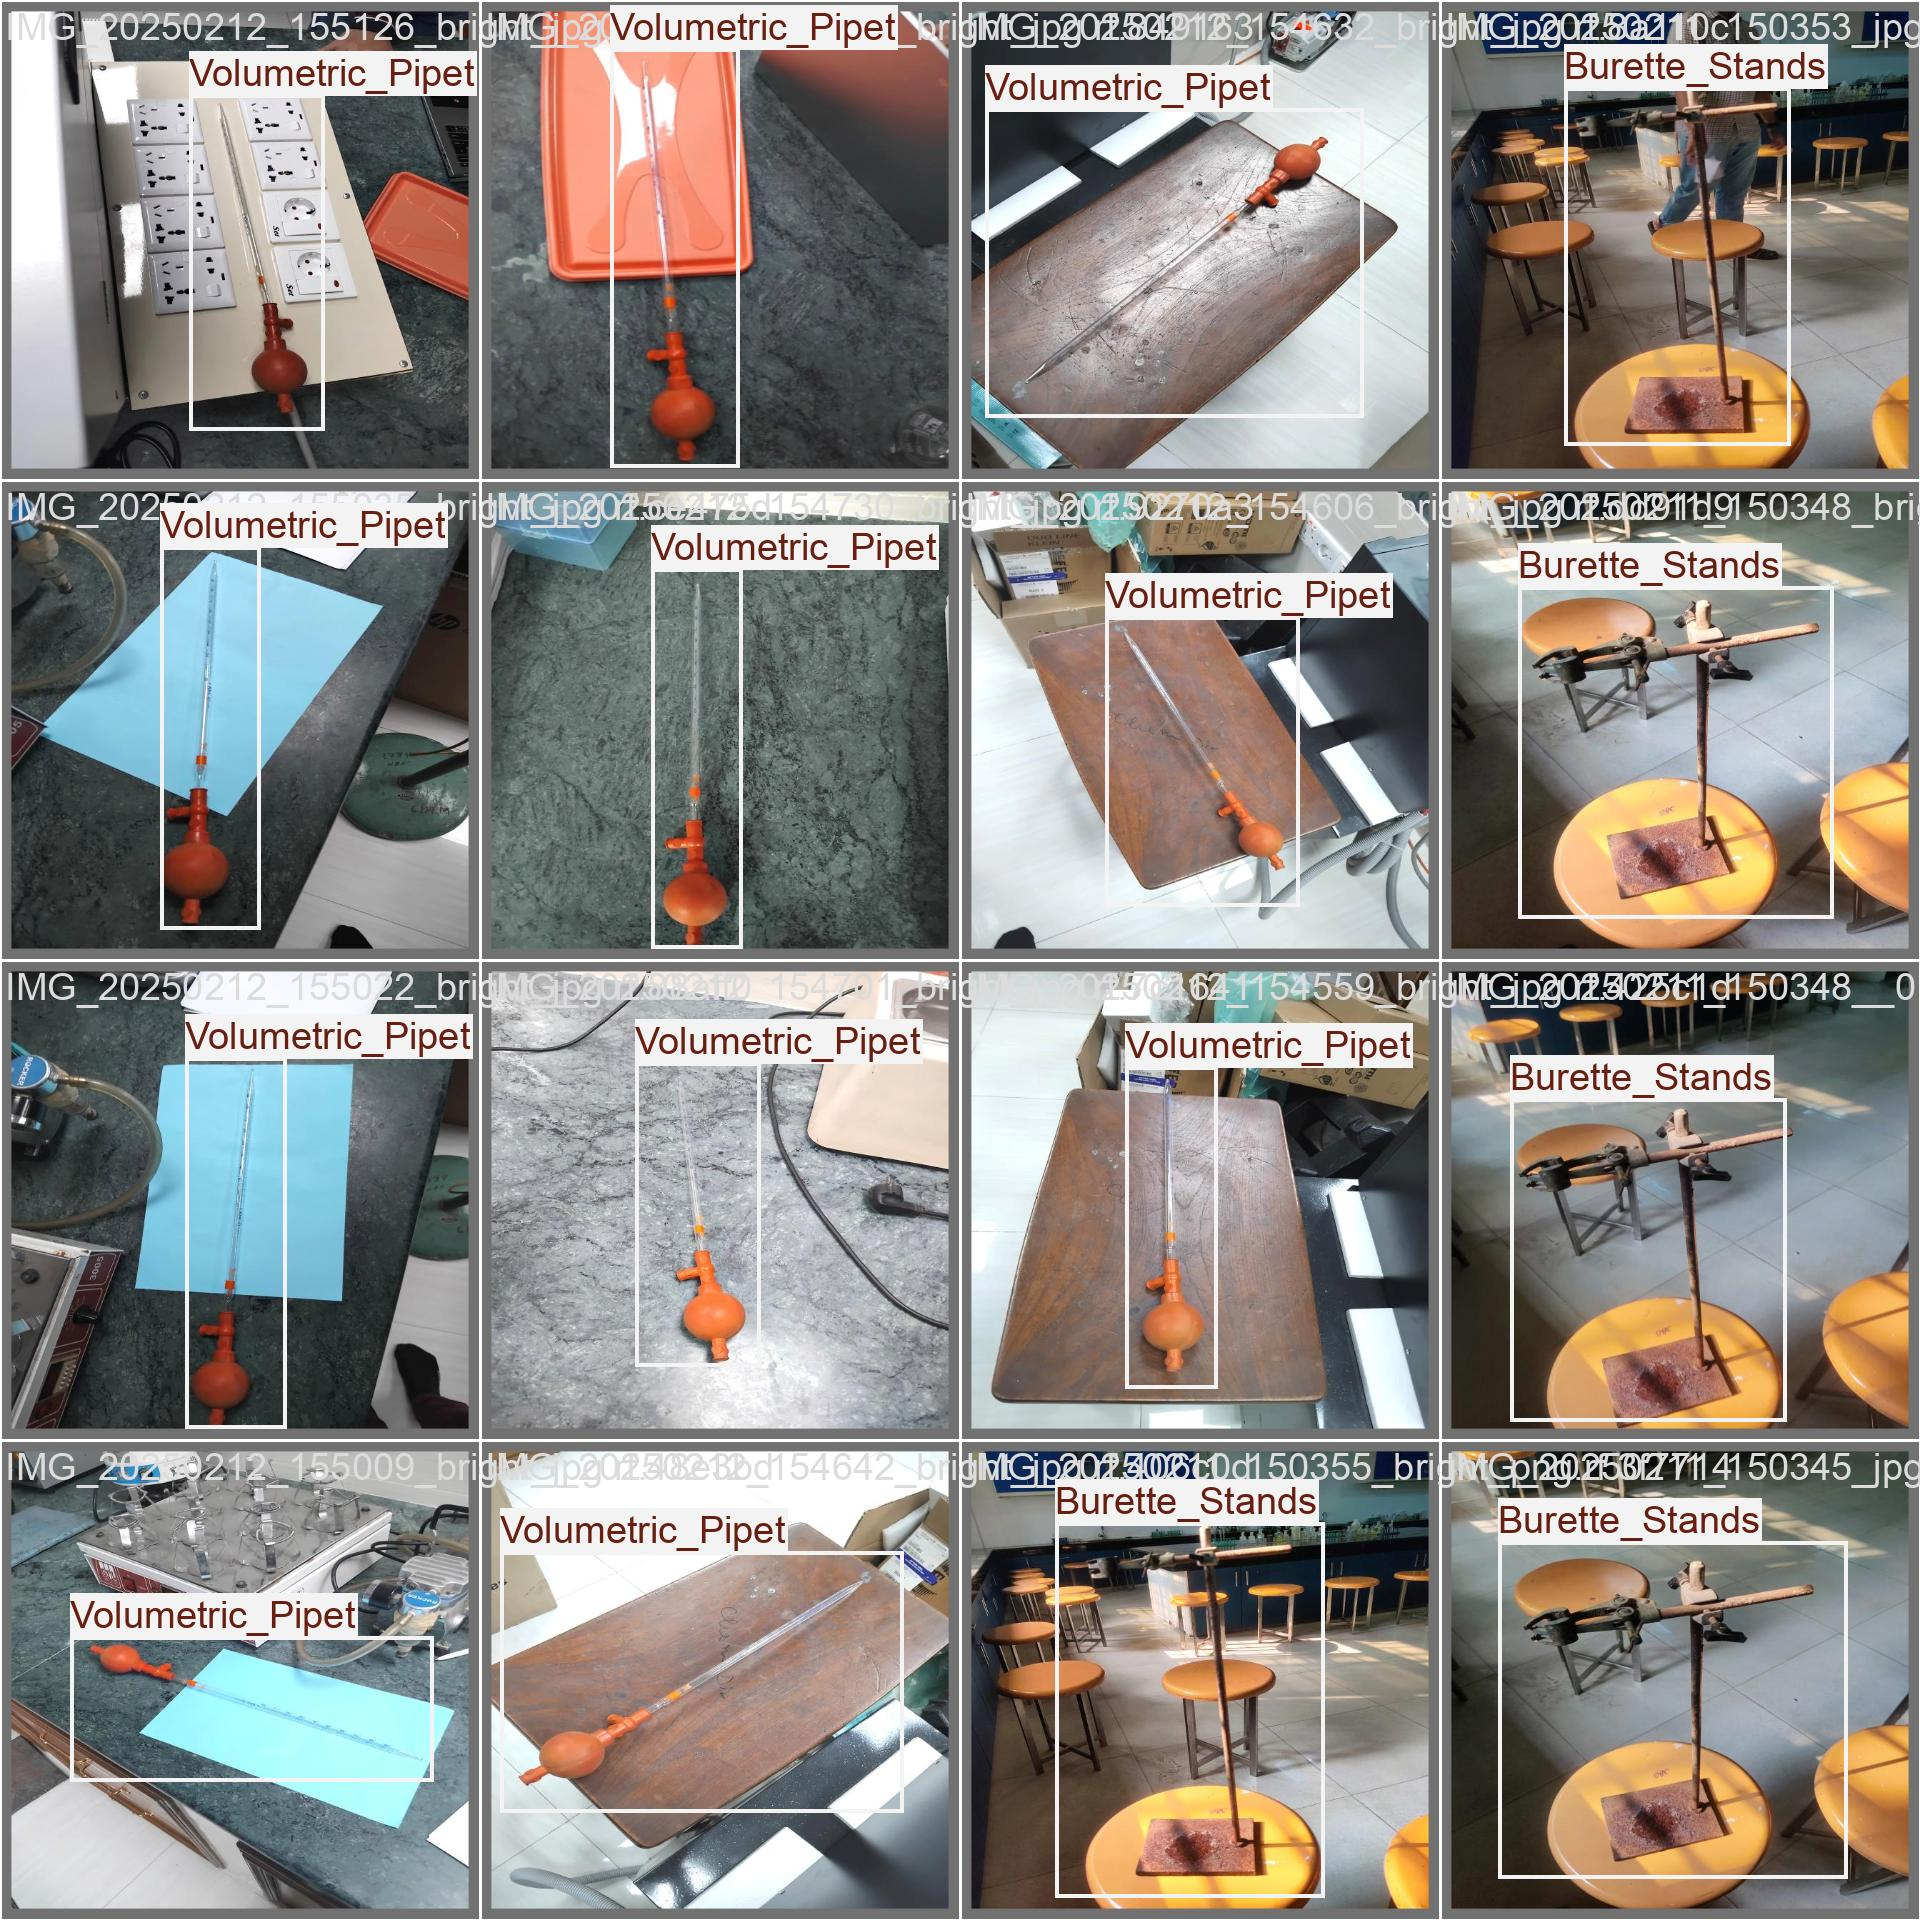

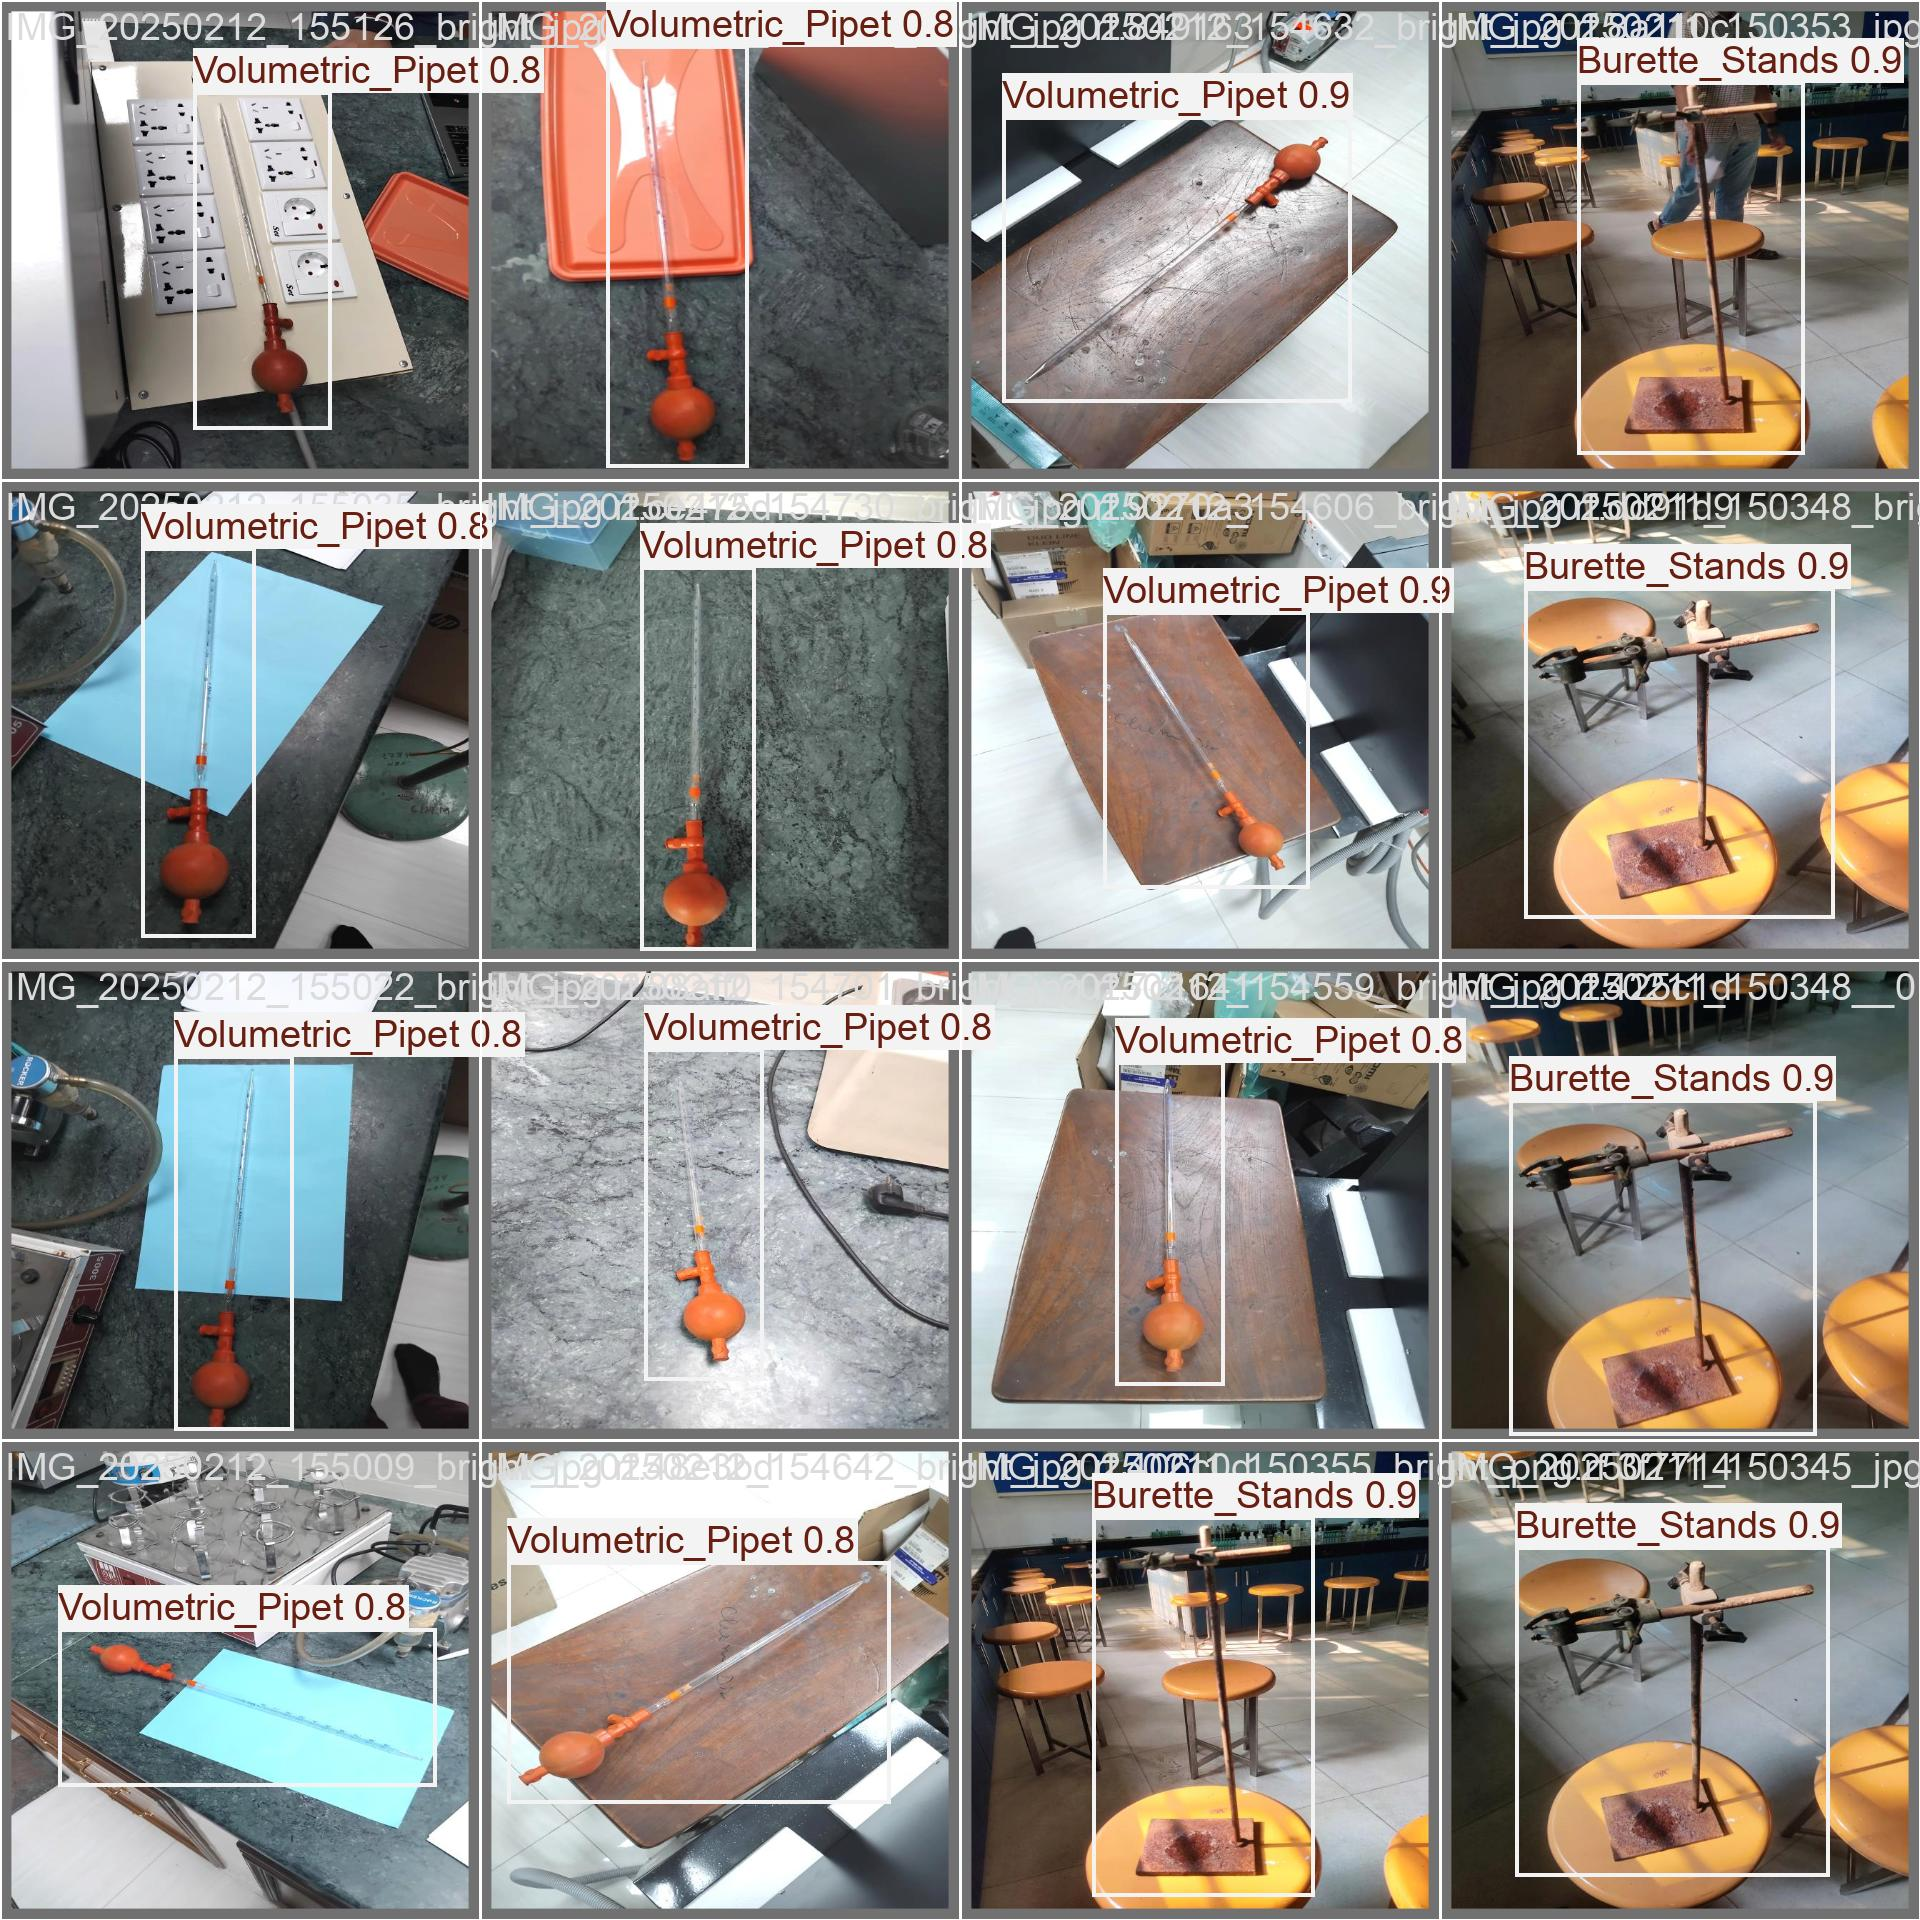

In [ ]:
from IPython.display import Image, display
import os

results_dir = '/content/runs/detect/yolov11_chemistry_apparatus'

result_files = [
    'results.png',
    'confusion_matrix.png',
    'val_batch0_labels.jpg',
    'val_batch0_pred.jpg'
]

for file in result_files:
    file_path = os.path.join(results_dir, file)
    if os.path.exists(file_path):
        display(Image(filename=file_path, width=800))
        print("\n")
    else:
        print(f"⚠️ File not found: {file_path}")

In [ ]:
!zip -r /content/yolov11_chemeq25.zip /content/runs/detect/yolov11_chemistry_apparatus
from google.colab import files
files.download('/content/yolov11_chemeq25.zip')

  adding: content/runs/detect/yolov11_chemistry_apparatus/ (stored 0%)
  adding: content/runs/detect/yolov11_chemistry_apparatus/val_batch1_labels.jpg (deflated 19%)
  adding: content/runs/detect/yolov11_chemistry_apparatus/val_batch1_pred.jpg (deflated 19%)
  adding: content/runs/detect/yolov11_chemistry_apparatus/labels.jpg (deflated 17%)
  adding: content/runs/detect/yolov11_chemistry_apparatus/PR_curve.png (deflated 20%)
  adding: content/runs/detect/yolov11_chemistry_apparatus/val_batch0_labels.jpg (deflated 7%)
  adding: content/runs/detect/yolov11_chemistry_apparatus/train_batch8082.jpg (deflated 13%)
  adding: content/runs/detect/yolov11_chemistry_apparatus/weights/ (stored 0%)
  adding: content/runs/detect/yolov11_chemistry_apparatus/weights/last.pt (deflated 8%)
  adding: content/runs/detect/yolov11_chemistry_apparatus/weights/best.pt (deflated 8%)
  adding: content/runs/detect/yolov11_chemistry_apparatus/labels_correlogram.jpg (deflated 34%)
  adding: content/runs/detect/yol

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>